In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.rcParams['figure.figsize']=(12,6)

In [2]:
#importing dataset
df = pd.read_csv("C:\\Users\\NWNB1531\\Devendra\\Data Science\\Learning\\EDA\\Loan Prediction\\loan_prediction.csv")

In [3]:
#first five records
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#last five records
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#since Loan_ID is not used, we preferred to be removed
df.drop('Loan_ID',axis=1,inplace=True)

In [8]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
#checking null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#filling null value of features Gender,Married,Dependents and Self_Employed

In [11]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [12]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
#since All the features are categorical features, we will use mode
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [16]:
#filling null value of feature LoanAmount,Loan_Amount_Term and Credit_History

In [17]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [18]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [19]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [20]:
#since LoanAmount,Loan_Amount_Term and Credit_History are discrete feature,therefore we will use mode
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [21]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#finding insights from Data

In [23]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [24]:
df_education_value = df['Education'].value_counts().index
df_education_count = df['Education'].value_counts().values

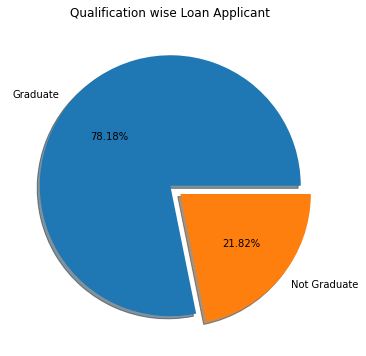

In [25]:
plt.pie(data=df,x=df_education_count,labels=df_education_value,explode=[0,0.1],autopct="%1.2f%%",shadow=True)
plt.title('Qualification wise Loan Applicant')
plt.show()

In [26]:
# 78.2% Loan Applicants are Graduates and 21.8% Loan Applicants are Non Graduates.

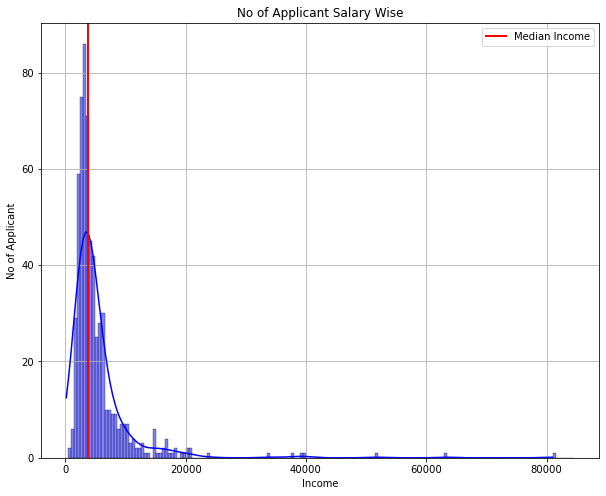

In [27]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='ApplicantIncome',bins=range(500,85000,500),kde=True,color='blue')
plt.xlabel('Income')
plt.ylabel('No of Applicant')
plt.title('No of Applicant Salary Wise')
plt.axvline(df['ApplicantIncome'].median(),color='red',label='Median Income',linewidth=2)
plt.grid()
plt.legend()

<AxesSubplot:xlabel='ApplicantIncome'>

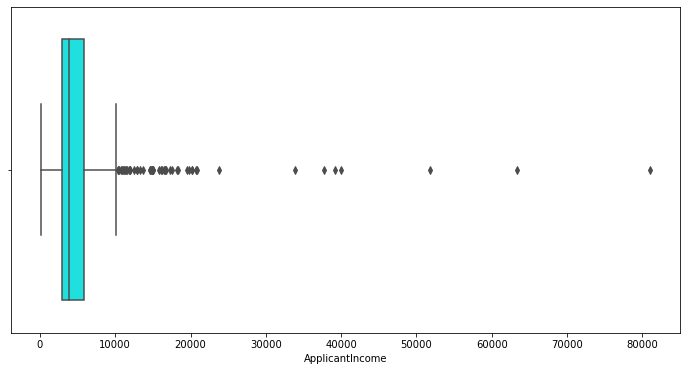

In [28]:
sns.boxplot(data=df,x='ApplicantIncome',color='cyan',linewidth=1.5)

In [29]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [30]:
#The distribution of ApplicantIncome is positive skewed i.e right skewed
#Also mean is greater than median
#The ApplicantIncome of 75% applicant is less than $5795

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
loan_approved_urban = len(df[(df['Property_Area']=='Urban')&(df['Loan_Status']=='Y')])

In [33]:
loan_rejected_urban = len(df[(df['Property_Area']=='Urban')&(df['Loan_Status']=='N')])

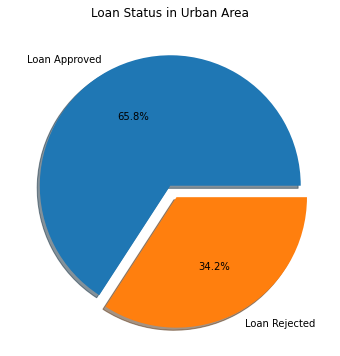

In [34]:
plt.pie(x=[loan_approved_urban,loan_rejected_urban],
        labels=['Loan Approved','Loan Rejected'],explode=[0,0.1],autopct='%1.1f%%',
       shadow=True)
plt.title('Loan Status in Urban Area')
plt.show()


In [35]:
# 65.8% are Loan Approved in Urban Area and 34.2% are Loan Rejected in Urban Area

In [36]:
loan_approved_rural = len(df[(df['Property_Area']=='Rural')&(df['Loan_Status']=='Y')])
loan_rejected_rural = len(df[(df['Property_Area']=='Rural')&(df['Loan_Status']=='N')])

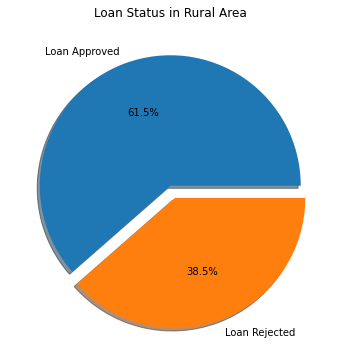

In [37]:
plt.pie(x=[loan_approved_rural,loan_rejected_rural],
        labels=['Loan Approved','Loan Rejected'],explode=[0,0.1],autopct='%1.1f%%',
       shadow=True)
plt.title('Loan Status in Rural Area')
plt.show()

In [38]:
# 61.5% are Loan Approved in Rural Area and 38.5% are Loan Rejected in Rural Area

In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


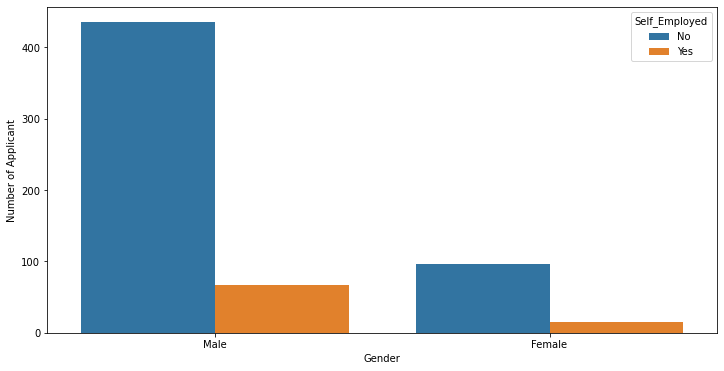

In [40]:
sns.countplot(data=df,x='Gender',hue='Self_Employed')
plt.ylabel('Number of Applicant')
plt.show()

In [41]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [42]:
male_self_employed = len(df[(df['Gender']=='Male')&(df['Self_Employed']=='Yes')])
male_self_employed

67

In [43]:
male_not_self_employed = len(df[(df['Gender']=='Male')&(df['Self_Employed']=='No')])
male_not_self_employed

435

In [44]:
female_self_employed = len(df[(df['Gender']=='Female')&(df['Self_Employed']=='Yes')])
female_self_employed

15

In [45]:
female_not_self_employed = len(df[(df['Gender']=='Female')&(df['Self_Employed']=='No')])
female_not_self_employed

97

In [46]:
#there are 502 applicant are males in which 67 are self employed and 435 are not self employed
#there are 112 applicant are females in which 15 are self employed and 97 are not self employed

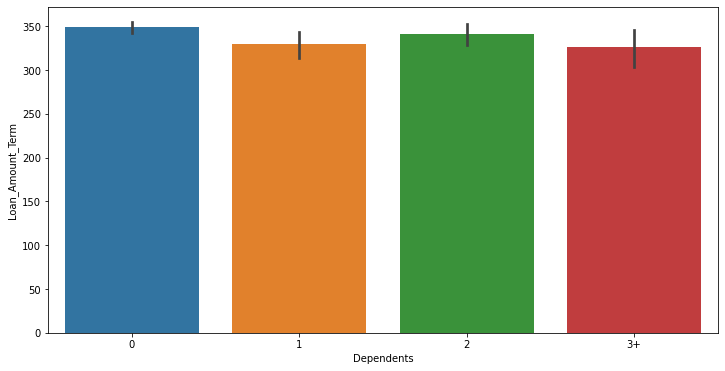

In [47]:
sns.barplot(data=df,y='Loan_Amount_Term',x='Dependents')
plt.show()

In [48]:
#irrespective of number of dependents, the loan amount term is almost uniform

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

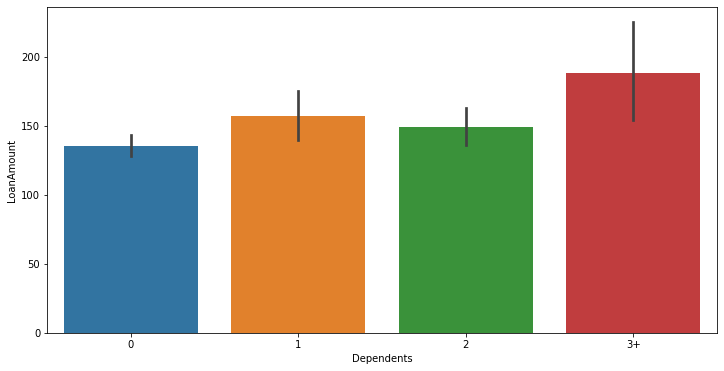

In [49]:
sns.barplot(data=df,x='Dependents',y='LoanAmount')

In [50]:
#as the number of dependents are increasing, the loan amount is also increased

In [51]:
co_applicant_income_not_zero = len(df[df['CoapplicantIncome']!=0])
co_applicant_income_not_zero

341

In [52]:
co_applicant_income_zero = len(df[df['CoapplicantIncome']==0])
co_applicant_income_zero

273

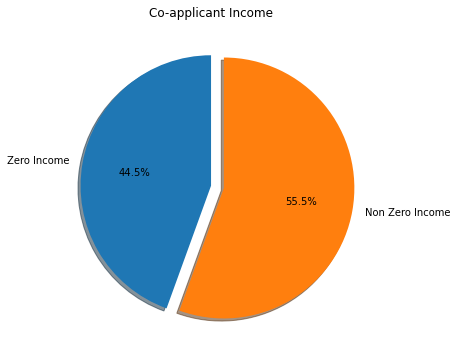

In [53]:
plt.pie(x=[co_applicant_income_zero,co_applicant_income_not_zero],labels=['Zero Income','Non Zero Income'],
        autopct='%1.1f%%',explode=[0,0.1],shadow=True,startangle=90 )
plt.title('Co-applicant Income')
plt.show()

In [54]:
#Out of 614 applicant,
#341 applicant are those where their co-applicant are also earning
#273 applicant are those where their co-applicant are not earning

In [55]:
#Handling Categorical and discrete features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [56]:
#handing the Gender feature
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [57]:
#1st method - using get_dummies
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)
#as 2 categories can be represented by one column,therefore we drop the first column

In [58]:
#handling the Married Column
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [59]:
#2nd method - using map function
df['Married'] = df['Married'].map({'No':0,'Yes':1})

In [60]:
#handling the Dependents Column
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [61]:
#3rd method- by changing the datatype
df['Dependents'] = df['Dependents'].str.replace('+','')

C:\Users\NWNB1531\AppData\Local\Temp/ipykernel_11936/119344664.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dependents'] = df['Dependents'].str.replace('+','')


In [62]:
df['Dependents'] = df['Dependents'].astype('int64')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    uint8  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(3), object(4), uint8(1)
memory usage: 53.5+ KB


In [64]:
#handling Self_Employed Feature
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])

In [66]:
df['Property_Area'] = le.fit_transform(df['Property_Area'])

In [67]:
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    uint8  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(4), int64(3), uint8(1)
memory usage: 43.9 KB


In [69]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

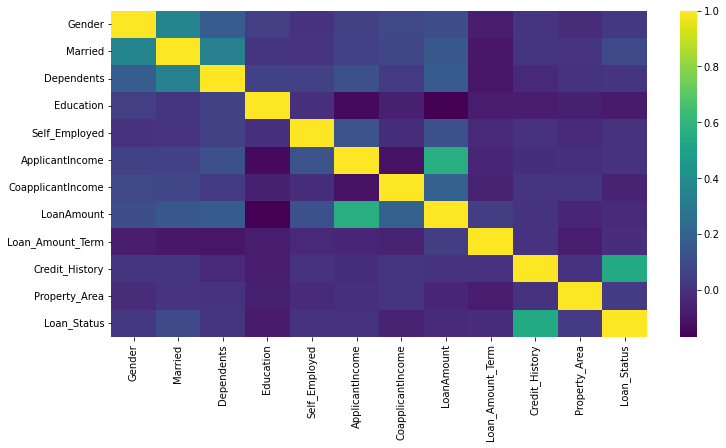

In [70]:

sns.heatmap(data=df.corr(),cmap='viridis')

In [71]:
#separating the independent and dependent feature

In [72]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [73]:
x = df.drop('Loan_Status',axis=1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [74]:
y = df['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [75]:
#train-test-split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [76]:
xtrain.shape

(460, 11)

In [77]:
xtest.shape

(154, 11)

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)
#as the test data should be remain new for model,we use transform otherwise it will learn from our test data.

In [79]:
#now our data is ready for modeling